In [24]:
import constants, Plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
myCmap=sns.diverging_palette(170, 330, l=65, center="dark", as_cmap=True)
physical = {constants.SHOCK: ['Time', 'Density', 'gasTemp', 'av', 'zeta', 'radfield', constants.SHOCKVEL],
            constants.HOTCORE: ['Time', 'Density', 'gasTemp', 'av', 'zeta', 'radfield']}
species=['#CH3OH', 'CH3OH', '#SIO', 'SIO']

In [26]:
def buildDataframe(tipo): 
    df= pd.read_csv(tipo+'.csv', index_col=0)

    df = df.loc[:,physical[tipo]+species+['runName']]
    for prop in physical[tipo]+species:
        with np.errstate(divide='ignore'): df[f'{prop}_log']=np.log10(df[prop])
    
    df=df.reset_index().drop(columns=['index'])
    df=df.join(pd.DataFrame(df['runName'].str.replace('.dat','').str.split('_').values.tolist(),
                            columns=constants.initparams[tipo]), rsuffix='_str')
    return df

In [27]:
tipo=constants.HOTCORE

df=buildDataframe(tipo)

In [28]:
singleAxis=False
nameBase=''
yaxis= [f'{prop}_log' for prop in species]
xaxis= [f'{prop}_log' for prop in physical[tipo]]

corr, fig = Plotting.corrGrid(df, xaxis, yaxis, tipo, 0)
xaxis, yaxis = Plotting.getCorrValues(corr, singleAxis)
plt.close()

In [33]:
def isValid(x, y):
    phases=['#','@','$']
    if x==y: return False
    elif 'Time' in x or 'Time' in y: return False
    elif x.strip('#@$')==y.strip('#@$'): return True
    for sym in phases:
        if sym in x and sym in y: return True
    return False

for i, y in enumerate(yaxis):
    if not isValid(xaxis[i], y): print(xaxis[i],y)

#CH3OH_log Time_log
CH3OH_log Time_log
SIO_log Time_log
SIO_log gasTemp_log
#SIO_log radfield_log


<Axes: xlabel='gasTemp_log', ylabel='SIO_log'>

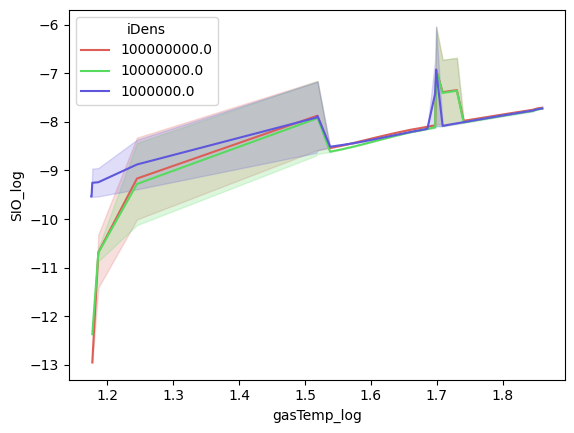

In [21]:
sns.lineplot(data=df, x="gasTemp_log", y="SIO_log", hue=constants.IDENS, palette='hls',
             errorbar=lambda x: (x.min(), x.max()))

# good scatter plot for species combination

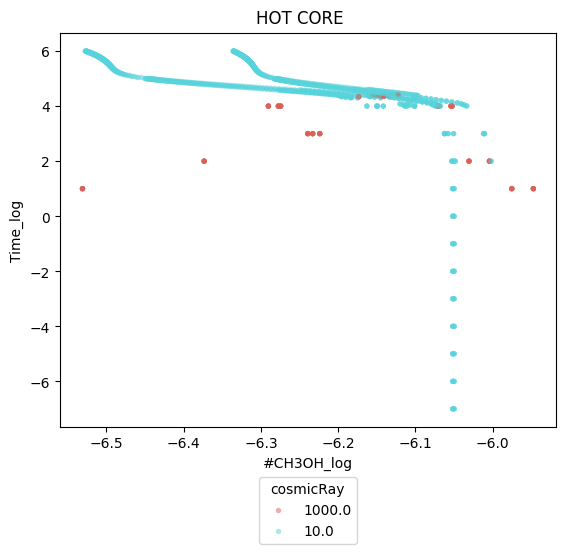

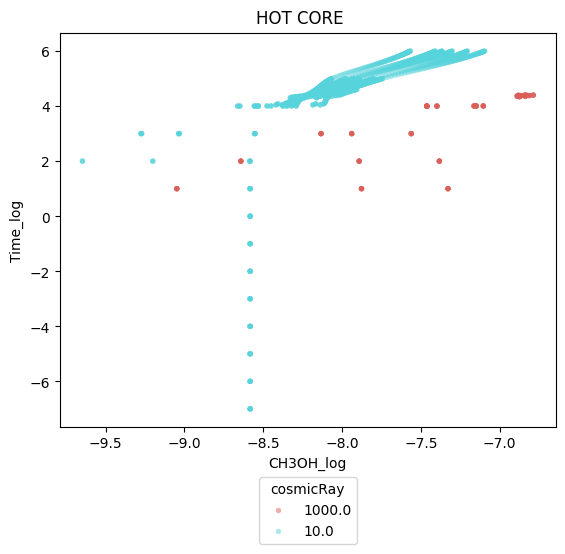

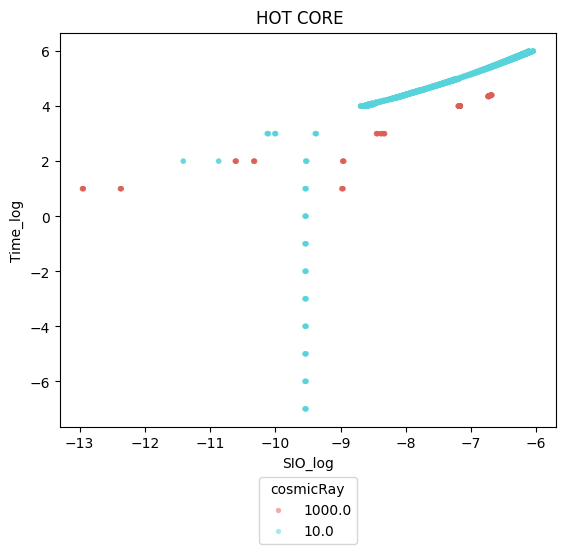

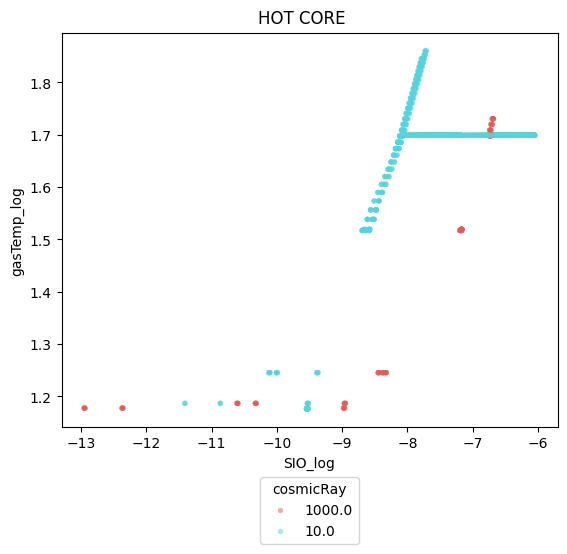

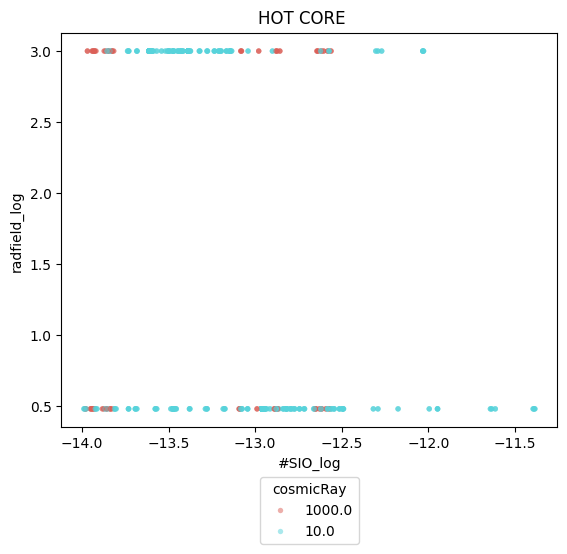

In [78]:
cosmicRay, interstellarRad, iDens, propio = constants.initparams[tipo]
for i, phys in enumerate(xaxis):
    fig = plt.figure()
    ax=fig.add_subplot(111)
    fig.subplots_adjust(top=0.93)

    spec=yaxis[i]
    figName=nameBase+phys+'_'+spec+'_'+'.png'

    ax=sns.scatterplot(df,x=phys,y=spec,
                        hue= cosmicRay,
                        palette='hls', 
                        linewidth=0, legend='full',
                        alpha=0.5, s=15
                        )
    sns.move_legend(ax, "upper center", bbox_to_anchor=(0.5, -0.11))
    fig.suptitle(tipo.upper())

# Primer intento

In [16]:
def getCorrMatrix(df, tipo, singleAxis):
    xaxis=[f'{prop}_log' for prop in species]
    yaxis= xaxis if singleAxis else [f'{prop}_log' for prop in physical[tipo]]

    cor = df.loc[:,xaxis if singleAxis else xaxis+yaxis].corr()
    cor=cor[cor.abs().ge(0.5)].loc[xaxis,yaxis].dropna(how='all').dropna(how='all', axis=1)
    return cor

In [17]:
def isValid(x, y):
    phases=['#','@','$']
    if x==y: return False
    elif x.strip('#@$')==y.strip('#@$'): return True
    for sym in phases:
        if sym in x and sym in y: return True
    return False

def getCorrValues(df, tipo, corrList, singleAxis):
    cor=getCorrMatrix(df, tipo, singleAxis)

    for i in cor.index:
        for j in cor.columns:
            if not np.isnan(cor.loc[i,j]):
                x=j.replace('_log','')
                y=i.replace('_log','')
                if singleAxis:
                    if isValid(x,y): corrList.append(pd.DataFrame(data={'tipo': tipo, 'x': x, 'y': y, 'coef': cor.loc[i,j]}, index=[0]))
                else: corrList.append(pd.DataFrame(data={'tipo': tipo, 'x': x, 'y': y, 'coef': cor.loc[i,j]}, index=[0]))

In [ ]:
corrList=[]
for tipo in physical:
    df=buildDataframe(tipo)
    for singleAxis in [False, True]:
        Plotting.getCorrValues(df, tipo, corrList, singleAxis)

corrs=pd.concat(corrList, ignore_index=True)

# pruebas

In [56]:
tipo=constants.SHOCK

df=buildDataframe(tipo)
df

In [ ]:
yaxis= [f'{prop}_log' for prop in species]
if singleAxis: xaxis=yaxis
else: xaxis= [f'{prop}_log' for prop in physical[tipo]]

corr, fig = Plotting.corrGrid(df, xaxis, yaxis, tipo, 0)
xaxis, yaxis = Plotting.getCorrValues(corr, singleAxis)

In [22]:
xaxis = [prop.replace('_log','') for prop in xaxis]
yaxis = [prop.replace('_log','') for prop in yaxis]


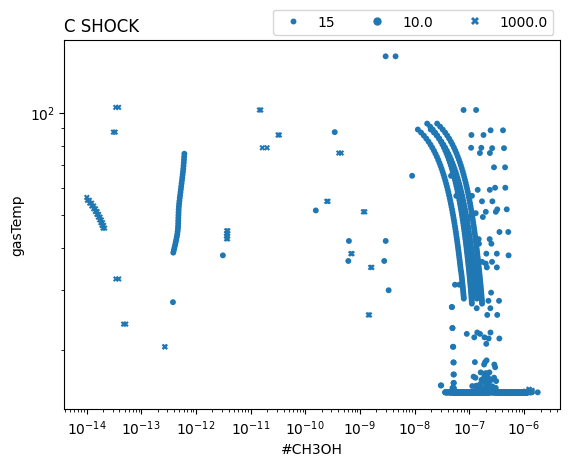

In [52]:
title=tipo
logxscale=False
logyscale=False

for i, phys in enumerate(xaxis):
    spec=yaxis[i]
    ax=sns.scatterplot(df,x=phys,y=spec,
                    # hue='zeta', palette='Spectral',
                    style='zeta',
                    linewidth=0, size=15
                    )
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.legend(loc='upper right',ncols=6, bbox_to_anchor=(1, 1.1))
    ax.set_title(title.upper(), loc='left')